<b>Thera Bank Personal Loan Campaign Project<b>

In [1]:
####################################################################
#PROJECT NAME: Thera Bank Personal Loan Campaign Project           #    
#                                                                  #
#                                                                  #                    
#PROGRAM NAME: Thera Bank Project                                  #
#                                                                  #
#AUTHOR:     Kevin Kluck                                           #
#DATE:       7/1 /2020                                             #
#                                                                  #
#Python Version:3.7.6                                              #      
#                                                                  #
#                                                                  #         
#ABSTRACT:The classification goal is to predict the                #
#   likelihood of a liability customer buying personal loans.      #         
#                                                                  #
####################################################################

<b>Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.<b>

In [2]:
##############################
##                          ##
##      Import Libraries    ##
##                          ##
##############################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer  
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [3]:
##############################
##                          ##
##      Import Data         ##
##                          ##
##############################


############# Would like to thank Therea Bank for sharing their data ###########
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv") 

In [4]:
############# python formating ##################
extra = {'Bold': '\x1b[1m',
        'Underline': '\x1b[4m',
        'End': '\x1b[0m'}

In [5]:
##################################
##                              ##
##      Explore Bank Data       ##
##                              ##
##################################

print(extra['Bold'],extra['Underline'],"\nData Types")
print("\n")
print(extra['End'],df.dtypes)

print(extra['Bold'],extra['Underline'],"\nStatistical Summary")
print("\n")
print(extra['End'],df.describe())

print(extra['Bold'],extra['Underline'],"\nShape")
print("\n")
print(extra['End'],df.shape)

print(extra['Bold'],extra['Underline'],"\nNumber of Missing Values per Column")
print("\n")
print(extra['End'],df.isnull().sum())

  
Data Types


 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object
  
Statistical Summary


                 ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000  

In [6]:
################### imputation of experience ##########################
df.sort_values(by='Experience').head(60)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4514,4515,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0
2618,2619,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0
4285,4286,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0
3796,3797,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0
2717,2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
4481,4482,25,-2,35,95045,4,1.00,3,0,0,0,0,1,0
3887,3888,24,-2,118,92634,2,7.20,1,0,0,1,0,1,0
2876,2877,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0
2962,2963,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0


Experience represents number years of professional experience, but there are a number of negative values and 0 values.It is possible to have no experience but not negative.

<b>EDA: Data distribution in each attribute and target variable.<b>

In [7]:
###### Checking for dublicates##################
dup = duplicate = df['ID'].duplicated()
print("Number of duplicates are:",sum(dup))
print("\n")
################## Number of Customers that don't have a Mortgage with the Bank ############# 
df_no = df['Mortgage'] ==0
c = df_no.value_counts()
print("Number of customers with no mortgage is:", c[1])
print("\n")
######## Number of people with zero credit card spending per month ########
df_spent = df['CCAvg'] ==0
spending = df_spent.value_counts()
print("Number of customers with  zero credit card spending per month is:", spending[1])


Number of duplicates are: 0


Number of customers with no mortgage is: 3462


Number of customers with  zero credit card spending per month is: 106


In [8]:
############### Change categorical variables to type object ###############
cleanup_names = {"Education": {1: "Undergrad", 2: "Graduate",3: "Advanced/Professional"},
                "Personal Loan": {0: "No", 1: "Yes"},
                "Securities Account": {0:"No", 1:"Yes"},
                "CD Account": {0: "No", 1: "Yes"},
                 "Online": {0: "No", 1: "Yes"},
                 "CreditCard": {0: "No", 1: "Yes"}}
df.replace(cleanup_names, inplace=True)

newName = {"Personal Loan": "Personal_Loan",
                "Securities Account": "Securities_Account",
                "CD Account": "CD_Account",
                "ZIP Code" : "ZIP_Code"}
df.rename(columns = newName, inplace = True)

############### Counts for categorical variables ###############

Ed =df['Education'].value_counts().sort_values(ascending = False)

print(extra['Underline'],"Education".ljust(50,' '), "Count",extra['End'],"\n")
for Education, count in Ed.iteritems():
    print(Education.ljust(52, " "), count)
print("\n")

Personal =df['Personal_Loan'].value_counts().sort_values(ascending = False)

print(extra['Underline'],"Accepted the Personal Loan Offered".ljust(50,' '), "Count",extra['End'],"\n")
for Personal_Loan, count in Personal.iteritems():
    print(Personal_Loan.ljust(52, " "), count)
print("\n")


Securities =df['Securities_Account'].value_counts().sort_values(ascending = False)

print(extra['Underline'],"Securities Account".ljust(50,' '), "Count",extra['End'],"\n")
for Securities_Account, count in Securities.iteritems():
    print(Securities_Account.ljust(52, " "), count)
print("\n")

CD =df['CD_Account'].value_counts().sort_values(ascending = False)

print(extra['Underline'],"CD Account".ljust(50,' '), "Count",extra['End'],"\n")
for CD_Account, count in CD.iteritems():
    print(CD_Account.ljust(52, " "), count)
print("\n")

Onl =df['Online'].value_counts().sort_values(ascending = False)

print(extra['Underline'],"Uses Online Banking".ljust(50,' '), "Count",extra['End'],"\n")
for Online, count in Onl.iteritems():
    print(Online.ljust(52, " "), count)
print("\n")

Credit =df['CreditCard'].value_counts().sort_values(ascending = False)

print(extra['Underline'],"Uses Bank Credit Card".ljust(50,' '), "Count",extra['End'],"\n")
for CreditCard, count in Credit.iteritems():
    print(CreditCard.ljust(52, " "), count)
print("\n")

 Education                                          Count  

Undergrad                                            2096
Advanced/Professional                                1501
Graduate                                             1403


 Accepted the Personal Loan Offered                 Count  

No                                                   4520
Yes                                                  480


 Securities Account                                 Count  

No                                                   4478
Yes                                                  522


 CD Account                                         Count  

No                                                   4698
Yes                                                  302


 Uses Online Banking                                Count  

Yes                                                  2984
No                                                   2016


 Uses Bank Credit Card                            

In [9]:
############### Zip Codes represent an area, so it doesn't make sense to view them as numeric ############
df['Zipcodes'] = df['ZIP_Code'].astype(object)
Zips =df['Zipcodes'].value_counts().sort_values(ascending = False)

print(extra['Underline'],"Zipcodes", "Count",extra['End'],"\n")
print(Zips)


 Zipcodes Count  

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94404      1
90068      1
94970      1
94965      1
90813      1
Name: Zipcodes, Length: 467, dtype: int64


In [10]:
####################### First digit of a zip code means national area and the next two represent sectional center
########### Looking at the first three digits will make less categories
df['Zipcodes'] = df['ZIP_Code'].astype(object)
df['Zip'] = df['Zipcodes'].astype(str).str.slice(0,3)
Zip = df['Zip'].value_counts().sort_values(ascending = False)
print(extra['Underline'],"ZipGroups", "Count",extra['End'],"\n")
print(Zip)

 ZipGroups Count  

900    375
921    279
950    267
945    264
941    257
943    257
947    251
920    248
940    242
913    222
926    182
956    162
902    161
917    150
958    141
931    134
939    102
951     96
946     89
928     81
949     75
911     71
927     62
923     60
930     58
925     49
907     45
934     43
919     41
957     40
906     38
935     36
904     35
955     32
916     29
960     29
910     29
905     28
953     26
954     19
959     19
908     19
933     18
937     18
948     17
924     17
944     13
914     13
952     13
922     10
936      8
912      7
942      7
966      6
961      5
918      3
903      2
Name: Zip, dtype: int64


Text(0.5, 1.0, 'Distribution of Age')

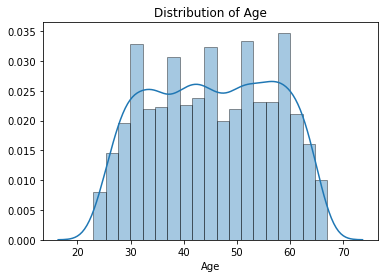

In [11]:
##################### Univariate and Bivariate #####################
sns.distplot(df['Age'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Age')




Text(0.5, 1.0, 'Distribution of Experience before imputation')

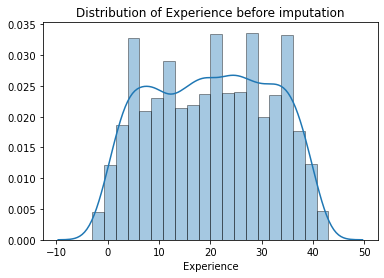

In [12]:
sns.distplot(df['Experience'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Experience before imputation')

Text(0.5, 1.0, 'Distribution of Experience after imputation')

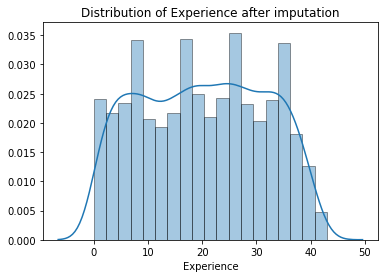

In [13]:
#For negative values, I will  change them possitve to see if the distrubution improve.
df['Experience'] = df['Experience'].abs()
#df.sort_values(by='Experience').head(60)
sns.distplot(df['Experience'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Experience after imputation') # This makes a little more sense

Text(0.5, 1.0, 'Distribution of Income')

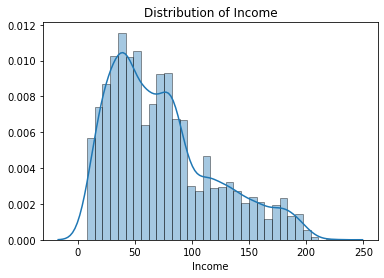

In [14]:
sns.distplot(df['Income'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Income') # Left distributioned, might have to apply transformation

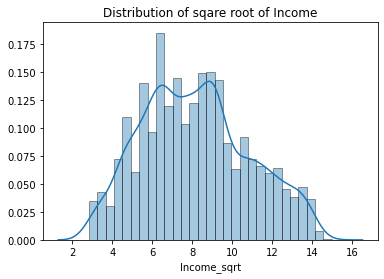

In [15]:
###################### Transform Income data to normalize distribution #################
plt.title('Distribution of sqare root of Income')
sqrt_transformer = FunctionTransformer(np.sqrt) # Exponential transform 
df['Income_sqrt'] = sqrt_transformer.fit_transform(df[['Income']]) 
sns.distplot(df['Income_sqrt'], hist_kws=dict(edgecolor="k", linewidth=1))

Text(0.5, 1.0, 'Distribution of Family Size')

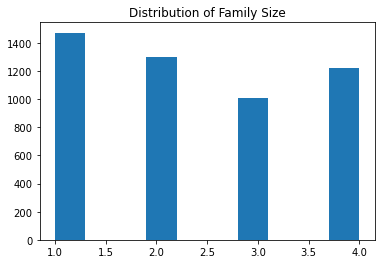

In [16]:
plt.hist(df['Family'])
plt.title('Distribution of Family Size')

Text(0.5, 1.0, 'Distribution of Credit Card Monthly Spending Average')

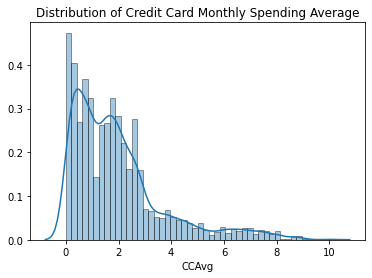

In [17]:
sns.distplot(df['CCAvg'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Credit Card Monthly Spending Average') 

This is heavily skewed right, so square root transformation will have to be applied.

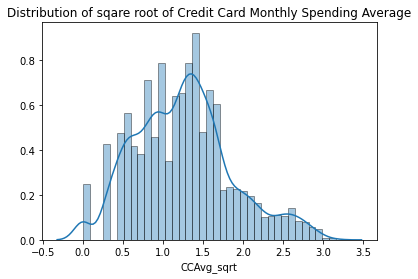

In [18]:
###################### Transform Credit Card Monthly Spending Average to normalize distribution #################
plt.title('Distribution of sqare root of Credit Card Monthly Spending Average')

df['CCAvg_sqrt'] = sqrt_transformer.fit_transform(df[['CCAvg']]) 
sns.distplot(df['CCAvg_sqrt'], hist_kws=dict(edgecolor="k", linewidth=1))

Text(0.5, 1.0, 'Distribution of Mortgage')

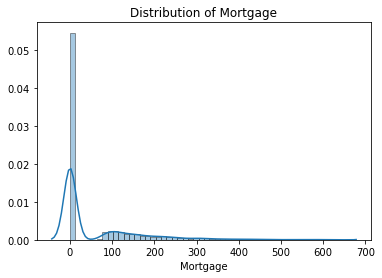

In [19]:
##### Mortgages ###########

sns.distplot(df['Mortgage'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Mortgage')

This is heavily skewed right, so square root transformation will have to be applied.

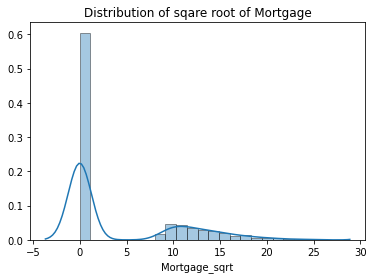

In [20]:
###################### Transform Mortgage data to normalize distribution #################
plt.title('Distribution of sqare root of Mortgage')

df['Mortgage_sqrt'] = sqrt_transformer.fit_transform(df[['Mortgage']]) 
sns.distplot(df['Mortgage_sqrt'], hist_kws=dict(edgecolor="k", linewidth=1))

Transformations does not make this distribution look any better, because most people don't have a morgage.

Text(0.5, 1.0, 'Distribution of Mortgage')

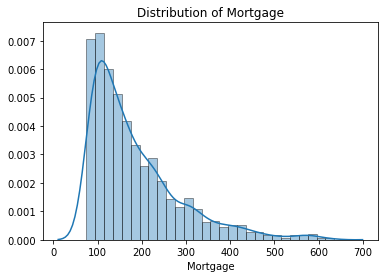

In [21]:
##### Remove no Mortgages ###########

df_no = df[(df['Mortgage']!=0)]
sns.distplot(df_no['Mortgage'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Mortgage') 

In [22]:
############ Drop variables not needed for analysis ####################
df1 = df.drop(columns=[ 'Mortgage_sqrt', 'Zipcodes', 'Income', 'CCAvg', 'ID'])


######### Make Dummies Variables ####################
df1 = pd.get_dummies(df1, columns=['Education'])#drop Education_Undergrad
df1=df1.drop(columns = 'Education_Undergrad')

cleanup_names = {"Personal_Loan": {"No":0, "Yes":1},
                "Securities_Account": {"No":0, "Yes":1},
                "CD_Account": {"No":0, "Yes":1},
                 "Online": {"No":0, "Yes":1},
                 "CreditCard": {"No":0, "Yes":1}}
df1.replace(cleanup_names, inplace=True)


Text(0.5, 1, 'CORRELATION BETWEEN VARIABLES')

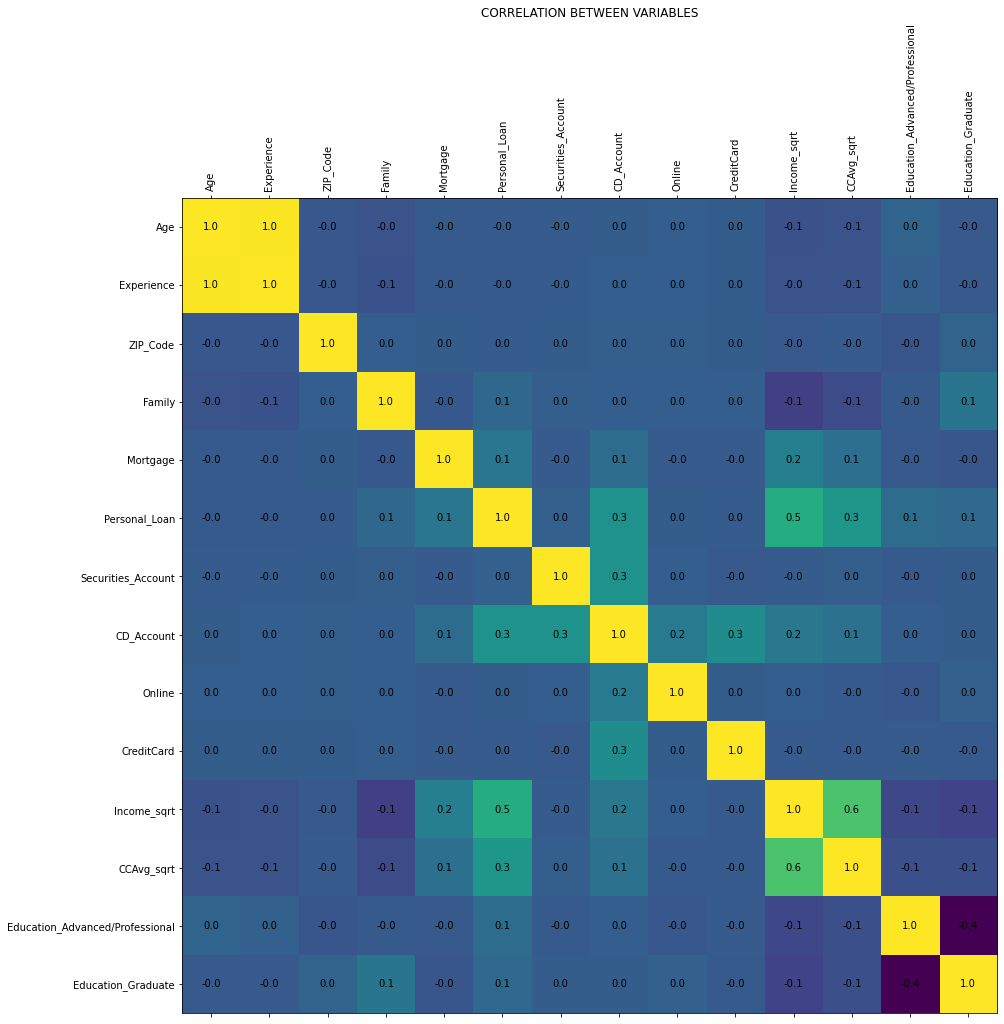

In [23]:
def plot_corr(df1, size=15):
    corr = df1.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plot_corr(df1)
plt.xticks(rotation = 90)
plt.title('CORRELATION BETWEEN VARIABLES', y = 1) 

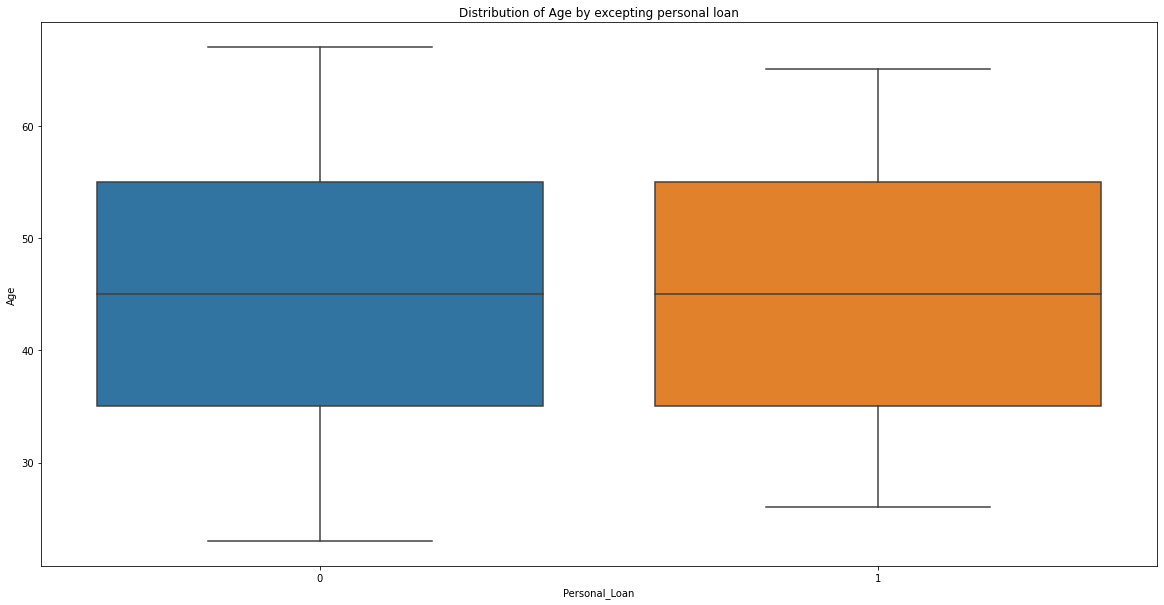

In [24]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Age by excepting personal loan')
sns.boxplot(df1['Personal_Loan'], df1['Age']);

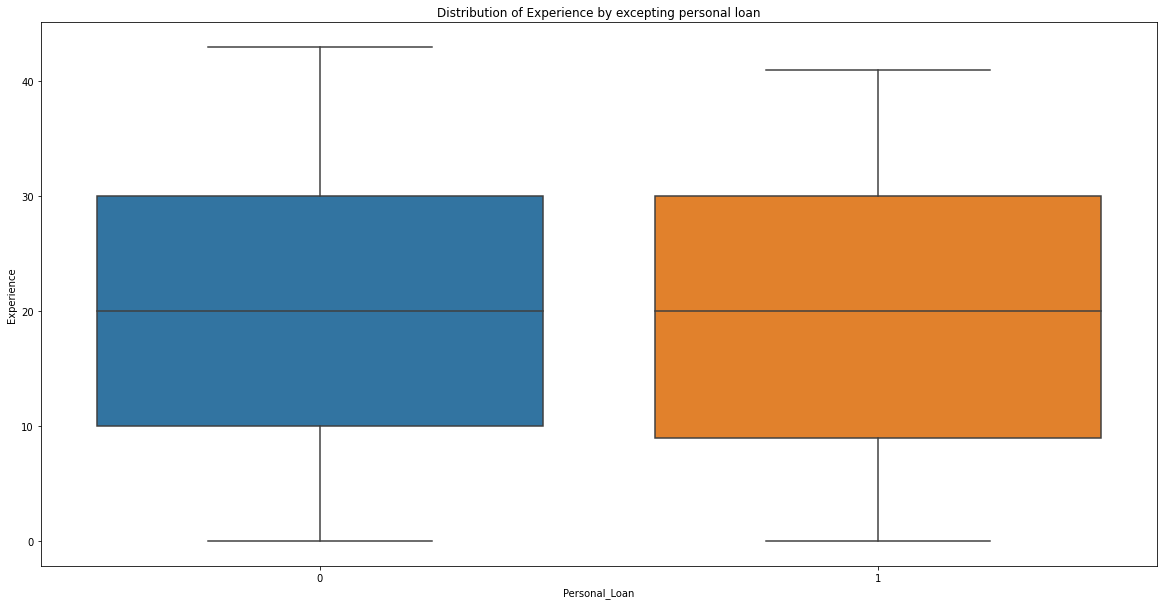

In [25]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Experience by excepting personal loan')
sns.boxplot(df1['Personal_Loan'], df1['Experience']);

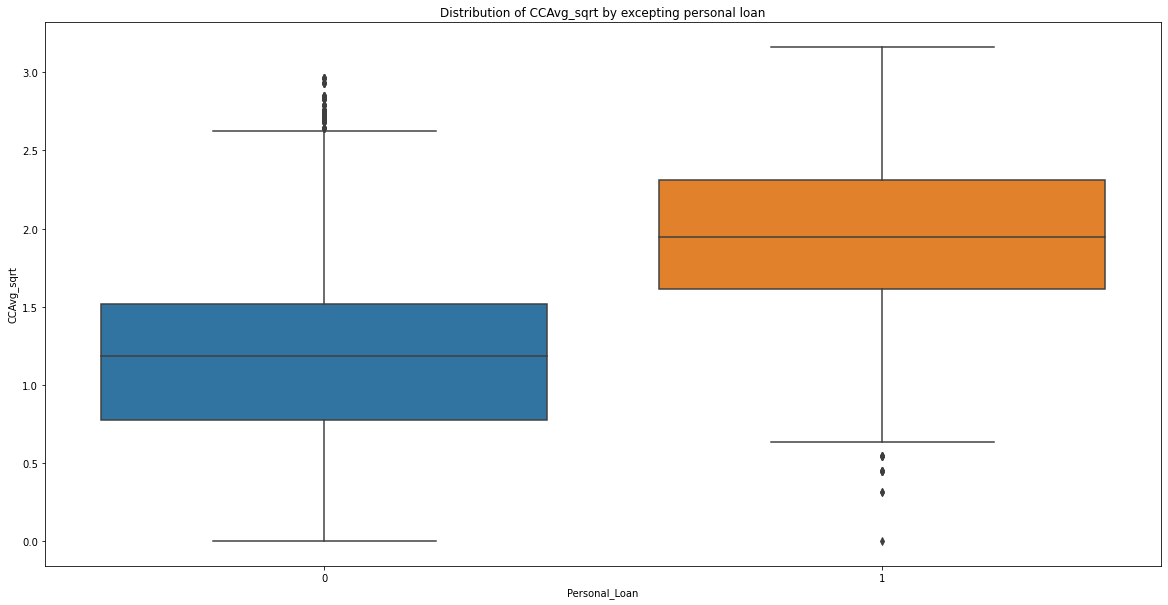

In [26]:
plt.figure(figsize=(20,10))
plt.title('Distribution of CCAvg_sqrt by excepting personal loan')
sns.boxplot(df1['Personal_Loan'], df1['CCAvg_sqrt']);

Text(0.5, 1, 'CORRELATION BETWEEN VARIABLES')

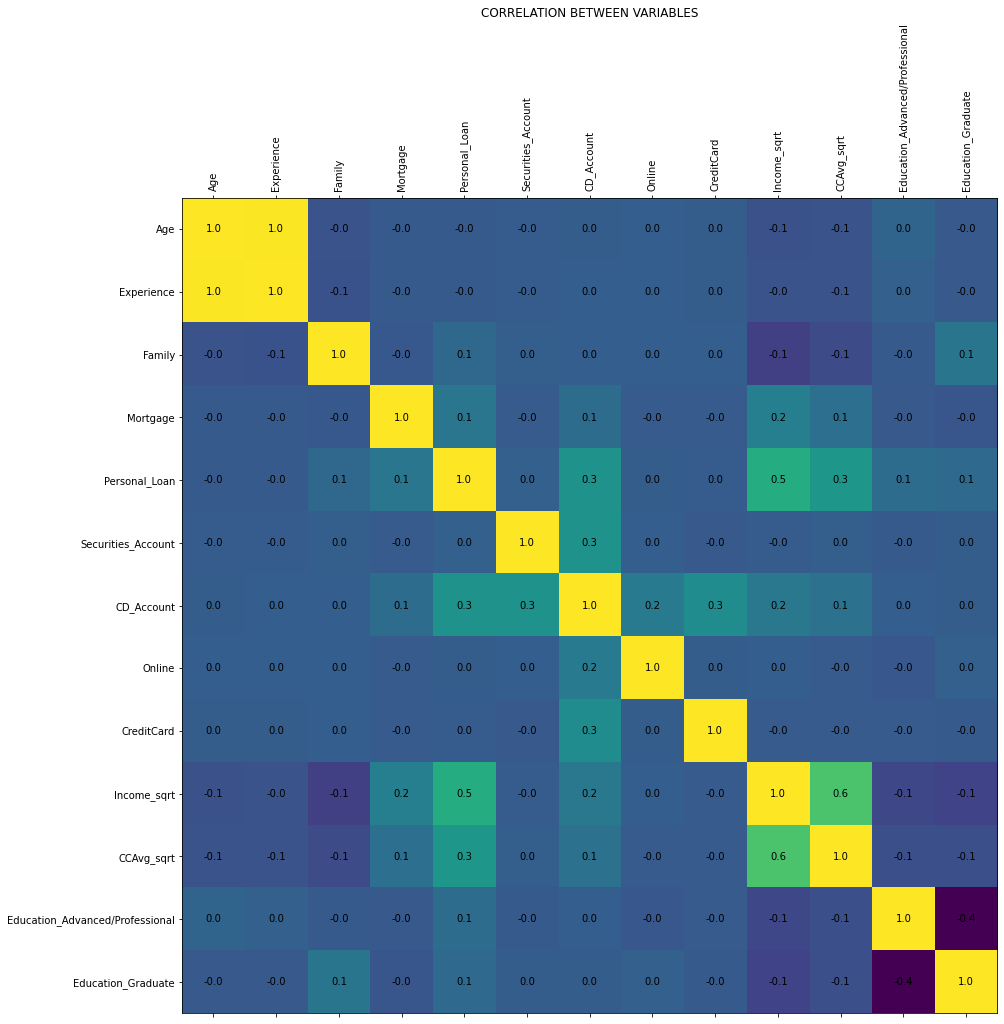

In [27]:
################# Drop ZipCodes, too many categories and no relation with any of the variables ########################
df2 = df1.drop(columns=['Zip', 'ZIP_Code'])

plot_corr(df2)
plt.xticks(rotation = 90)
plt.title('CORRELATION BETWEEN VARIABLES', y = 1) 


There appears to be some positive correction between square root of income and Cread Card Average with Personal Loans.There is also correlation between Credit card and Income. There is also relation between age and experience.

In [28]:
########################## Add a cross variable ##############################
######################### Since there might be a realtion between Credit Card average and income I'll add a cross varaible
######################### Add cross variable between Age and Experience #########
df2['CC&Income'] = df2.Income_sqrt * df2.CCAvg_sqrt
df2['Age&Experience'] = df2.Age * df2.Experience

<b>Split the data into training and test set in the ratio of 70:30 respectively. 
   The target variable is Personal Loan.<b>

In [29]:

X = df2.drop('Personal_Loan',axis=1)
Y = df2['Personal_Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1729)



In [30]:
############# Check to see if ratio of target is the same for orginal as in Training and test #############


print("".ljust(38, " "),"Count","Percent")
print("\n")
print("Original Personal_Loan True Values    :",len(df2.loc[df2['Personal_Loan'] == 1]),"  ",(round(len(df2.loc[df2['Personal_Loan'] == 1])/len(df2)*100,1)))
print("Training Personal_Loan False Values   :",len(df2.loc[df2['Personal_Loan'] == 0])," ",(round(len(df2.loc[df2['Personal_Loan'] == 0])/len(df2)*100,1)))
print("\n")
print("Training Personal_Loan True Values    :",len(y_train[y_train[:] == 1]),"  ",(round(len(y_train[y_train[:] == 1])/len(y_train)*100,1)))
print("Training Personal_Loan False Values   :",len(y_train[y_train[:] == 0])," ",(round(len(y_train[y_train[:] ==0])/len(y_train)*100,1)))
print("\n")
print("Test Personal_Loan True Values         :",len(y_test[y_test[:] == 1]),"  ",(round(len(y_test[y_test[:] == 1])/len(y_test)*100,1)))
print("Test Personal_Loan False Values        :",len(y_test[y_test[:] == 0])," ",(round(len(y_test[y_test[:] ==0])/len(y_test)*100,1)))


                                       Count Percent


Original Personal_Loan True Values    : 480    9.6
Training Personal_Loan False Values   : 4520   90.4


Training Personal_Loan True Values    : 335    9.6
Training Personal_Loan False Values   : 3165   90.4


Test Personal_Loan True Values         : 145    9.7
Test Personal_Loan False Values        : 1355   90.3


<b>Use Logistic Regression model to predict the number of a customers buying personal loans.<b> 

In [31]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.092806
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.7059
Time:                        22:37:49   Log-Likelihood:                -324.82
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -43.8889      3.953    -11.103 

In [32]:
x_train = x_train.drop(columns=['Age&Experience'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.092811
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.7059
Time:                        22:37:49   Log-Likelihood:                -324.84
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -43.9738      3.927    -11.199 

Remove variables that are not statisitical significant by removing them one at a time

In [33]:
x_train = x_train.drop(columns=['Mortgage'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.092932
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.7055
Time:                        22:37:49   Log-Likelihood:                -325.26
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -44.2301      3.924    -11.270 

In [34]:
x_train = x_train.drop(columns=['Securities_Account'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.093421
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.7040
Time:                        22:37:49   Log-Likelihood:                -326.97
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -45.0019      3.933    -11.443 

In [35]:
x_train = x_train.drop(columns=['Experience'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.093861
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.7026
Time:                        22:37:49   Log-Likelihood:                -328.51
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -47.6987      3.615    -13.194 

In [36]:
x_train = x_train.drop(columns=['Age'],axis=1)
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.093882
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.7025
Time:                        22:37:50   Log-Likelihood:                -328.59
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -47.7775      3.604    -13.259 

In [37]:
############### Remove same variables in test data to compare #############################
x_test = x_test.drop(columns=['Age&Experience', 'Age', 'Experience', 'Mortgage', 'Securities_Account'],axis=1)

In [38]:
logreg = LogisticRegression(random_state=1729)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1729, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_predict = logreg.predict(x_test)

In [40]:
########################## Model Performance ########################
print("Trainig accuracy:     ",logreg.score(x_train,y_train))  
print("\n")
print("Testing accuracy:     ", logreg.score(x_test, y_test))
print("\n")
print("Recall:               ", recall_score(y_test,y_predict))
print("\n")
print("Precision:            ",precision_score(y_test,y_predict))
print("\n")
print("F1 Score:             ",f1_score(y_test,y_predict))
print("\n")
print("Roc Auc Score:        ",roc_auc_score(y_test,y_predict))


Trainig accuracy:      0.9648571428571429


Testing accuracy:      0.962


Recall:                0.6758620689655173


Precision:             0.9074074074074074


F1 Score:              0.7747035573122529


Roc Auc Score:         0.8342409975823896


Confusion Matrix



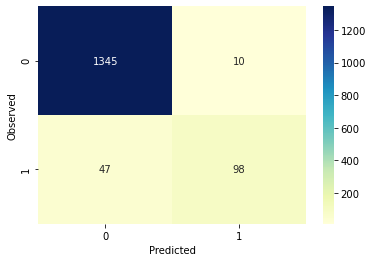

None


In [41]:
################ Make Confusion Matrix ##################
def confusion( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] , cmap="YlGnBu")
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print('Confusion Matrix')
print()
print(confusion(y_test,y_predict))


<b>How can the model perform better?<b>

In [42]:
################ Checking Parameters ############
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1729, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Looking at the training accuracy and testing accuracy, 96.5 % and 96.2 % respectively, it seems overfitting isn't an issue. But I could have gone a different approach with some of the variables.

Mortgage data isn't normally distributed so finding a transformation that would have normalize the distribution could make the variable significant. Another idea, since there were so many people that didn't have a mortgage, adding a categorical variable of those who have a mortgage and those who don't.

I had to drop zip codes from the model because there were too many categories, but maybe if I could have found a way to group the zip codes into like 3 or 5 groups, I could have added those to the model. Another idea uses zip codes to find longitude and latitude of each person and add those variables to the model. Maybe location has to do with whether someone excepts a personal loan.

Crossing the variables, average credit card balances and income, work out to be significant, so maybe exploring other crosses of variables could have help the model as well.

With customer ages, I assumed the negative values were a mistake and made them all positive, but if I could have contacted someone at the bank and found out what the negative values meant, I would have imputed differently. Age could have played a more significant part in predicting customers to except a personal loan.

Changing the threshold would have improve the Precision, F1 score and Roc Auc Score.

The default solver for logistic regression is 'lbfgs', so changing the solver setting for logistic regression to newton-cg, liblinear, sag, or saga may have improved the model.

The default value for C is 1.0, maybe try different values between 0 and 1 may improve the model.





<b>Interpretation of the model, from a business perspective.<b>

In [43]:
################# Use Odds Ratio to Interprete model ###########

lgco = pd.DataFrame(lg.params, columns=['coef'])
lgco.loc[:, "Odds_ratio"] = np.exp(lgco.coef)
pd.options.display.float_format = '{:.2f}'.format
lgco['probability'] = lgco['Odds_ratio']/(1+lgco['Odds_ratio'])
lgco = lgco.sort_values(by="Odds_ratio", ascending=False)

lgco

,coef,Odds_ratio,probability
CCAvg_sqrt,16.06,9421968.41,1.00
Education_Graduate,4.18,65.58,0.98
Education_Advanced/Professional,3.87,47.98,0.98
Income_sqrt,3.62,37.21,0.97
CD_Account,3.44,31.28,0.97
Family,0.75,2.11,0.68
Online,-0.65,0.52,0.34
CreditCard,-1.12,0.33,0.25
CC&Income,-1.30,0.27,0.21
const,-47.78,0.00,0.00


After modeling the Thera Bank data set, I found customers who accept a personal loan offered in the last campaign had the following characteristics.

Customers with an education level of graduate were over 65 times more likely to take the loan than customers that were at undergrade. Customers with an education level of advance/professional were around 48 times more likely to take the loan than customers that were at undergrade.

Customers with CD Account were over 31 times more likely to accept the loan than those who didn't. 
Customers who used internet banking facilities were less likely to except the loan than those who didn't. 

Customers who used the credit card issued by the bank were less likely to except the loan than those who didn't. 

For each additional family member customers were over 2 times more likely to except the loan. 

Customers with high Average spending on credit cards per month were more likely to accept the loan.
This was the strongest indicated whether customers except the loan or not.

Another strong indicated was yearly income. For every 1000 increase income a customer was over 37 times more likely to except the loan.
